In [2]:
import tabula
import numpy as np
import PyPDF2
import pandas as pd
import os

In [3]:
df_V0 = pd.read_csv('historicos1.csv')

In [4]:
df_V0.columns

Index(['1_c', '1_f', '1_n', '2_c', '2_f', '2_n', '3_c', '3_f', '3_n', 'y',
       '4_c', '4_f', '4_n', '5_c', '5_f', '5_n', '6_c', '6_f', '6_n', '7_c',
       '7_f', '7_n', '8_c', '8_f', '8_n', '9_c', '9_f', '9_n', '10_c', '10_f',
       '10_n', '11_c', '11_f', '11_n', '12_c', '12_f', '12_n', '13_c', '13_f',
       '13_n', '14_c', '14_f', '14_n', '15_c', '15_f', '15_n', '16_c', '16_f',
       '16_n', '17_c', '17_f', '17_n', '18_c', '18_f', '18_n', '19_c', '19_f',
       '19_n'],
      dtype='object')

In [11]:
# Supondo que df é o seu DataFrame
colunas_para_deletar_V8 = ['9_c', '9_f', '9_n', '10_c', '10_f', '10_n', '11_c', '11_f', '11_n', '12_c', '12_f', '12_n', '13_c', '13_f', '13_n', '14_c', '14_f', '14_n', '15_c', '15_f', '15_n', '16_c', '16_f', '16_n', '17_c', '17_f', '17_n', '18_c', '18_f', '18_n', '19_c', '19_f', '19_n']

# Deletando as colunas
df_V8 = df_V0.drop(columns=colunas_para_deletar_V8)


In [10]:
# Supondo que df é o seu DataFrame
colunas_para_deletar_V2 = ['3_c', '3_f', '3_n','4_c', '4_f', '4_n', '5_c', '5_f', '5_n', '6_c', '6_f', '6_n', '7_c',
       '7_f', '7_n', '8_c', '8_f', '8_n', '9_c', '9_f', '9_n', '10_c', '10_f', '10_n', '11_c', '11_f', '11_n', '12_c', '12_f', '12_n', '13_c', '13_f', '13_n', '14_c', '14_f', '14_n', '15_c', '15_f', '15_n', '16_c', '16_f', '16_n', '17_c', '17_f', '17_n', '18_c', '18_f', '18_n', '19_c', '19_f', '19_n']

# Deletando as colunas
df_V2 = df_V0.drop(columns=colunas_para_deletar_V2)


In [5]:
colunas_para_deletar_V1 = [ '2_c', '2_f', '2_n','3_c', '3_f', '3_n','4_c', '4_f', '4_n', '5_c', '5_f', '5_n', '6_c', '6_f', '6_n', '7_c',
       '7_f', '7_n', '8_c', '8_f', '8_n', '9_c', '9_f', '9_n', '10_c', '10_f', '10_n', '11_c', '11_f', '11_n', '12_c', '12_f', '12_n', '13_c', '13_f', '13_n', '14_c', '14_f', '14_n', '15_c', '15_f', '15_n', '16_c', '16_f', '16_n', '17_c', '17_f', '17_n', '18_c', '18_f', '18_n', '19_c', '19_f', '19_n']

# Deletando as colunas
df_V1 = df_V0.drop(columns=colunas_para_deletar_V1)


In [6]:
df_V1

,1_c,1_f,1_n,y
0,58.666667,69.443333,2.700000,1
1,58.666667,95.483333,6.083333,1
2,57.600000,74.998000,1.020000,1
3,64.000000,37.500000,0.000000,1
4,58.666667,91.838333,4.766667,1
...,...,...,...,...
263,58.666667,92.013333,6.483333,1
264,58.666667,88.541667,6.666667,1
265,58.666667,90.450000,5.083333,1
266,58.666667,94.963333,6.766667,1


In [7]:
# Contando o número de linhas com valores NaN
num_linhas_nan = df_V1.isnull().any(axis=1).sum()
print(f'Número de linhas com valores NaN: {num_linhas_nan}')


Número de linhas com valores NaN: 0


In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
# Definindo as variáveis independentes (X) e a variável alvo (y)
X = df_V1.drop('y', axis=1)  # Substitua 'target' pelo nome da sua variável alvo
y = df_V1['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Inicializando o classificador
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Treinando o modelo
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [29]:
y_pred = rf.predict(X_test)

# Avaliando o modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7407407407407407


In [30]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf = RandomForestClassifier()

# Definir os hiperparâmetros a serem ajustados
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(rf, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Mostrar os melhores hiperparâmetros encontrados
print("Melhores hiperparâmetros encontrados:")
print(grid_search.best_params_)

# Avaliar o modelo com os melhores hiperparâmetros
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 720 candidates, totalling 3600 fits
Melhores hiperparâmetros encontrados:
{'bootstrap': True, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.91      0.48      0.62        21
           1       0.74      0.97      0.84        33

    accuracy                           0.78        54
   macro avg       0.83      0.72      0.73        54
weighted avg       0.81      0.78      0.76        54



In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Carregar os dados
# Definir os hiperparâmetros para busca
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Parâmetro de regularização
    'solver': ['liblinear', 'lbfgs'],  # Algoritmos de otimização
    'max_iter': [100, 200, 500]  # Número máximo de iterações
}

# Criar o modelo
log_reg = LogisticRegression()

# Grid Search com validação cruzada
grid_search_log = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_log.fit(X_train, y_train)

# Melhor modelo encontrado
print("Melhores parâmetros para Regressão Logística:", grid_search_log.best_params_)
print("Melhor acurácia:", grid_search_log.best_score_)

Melhores parâmetros para Regressão Logística: {'C': 100, 'max_iter': 100, 'solver': 'liblinear'}
Melhor acurácia: 0.8318936877076413


In [32]:
from sklearn.tree import DecisionTreeClassifier

# Definir os hiperparâmetros para busca
param_grid_tree = {
    'criterion': ['gini', 'entropy'],  # Critério de divisão
    'max_depth': [3, 5, 10, None],  # Profundidade máxima
    'min_samples_split': [2, 5, 10],  # Mínimo de amostras para dividir um nó
    'min_samples_leaf': [1, 2, 4]  # Mínimo de amostras em cada folha
}

# Criar o modelo
tree_clf = DecisionTreeClassifier(random_state=42)

# Grid Search com validação cruzada
grid_search_tree = GridSearchCV(tree_clf, param_grid_tree, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_tree.fit(X_train, y_train)

# Melhor modelo encontrado
print("Melhores parâmetros para Árvore de Decisão:", grid_search_tree.best_params_)
print("Melhor acurácia:", grid_search_tree.best_score_)

Melhores parâmetros para Árvore de Decisão: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 5}
Melhor acurácia: 0.8509413067552603


In [33]:
from sklearn.ensemble import GradientBoostingClassifier
param_grid_gb = {
    'n_estimators': [50, 100, 200],  # Número de árvores
    'learning_rate': [0.01, 0.1, 0.2],  # Taxa de aprendizado
    'max_depth': [3, 5, 7],  # Profundidade máxima da árvore
    'subsample': [0.8, 1.0]  # Fração de amostras usadas em cada árvore
}

# Criar o modelo
gb_clf = GradientBoostingClassifier(random_state=42)

# Grid Search com validação cruzada
grid_search_gb = GridSearchCV(gb_clf, param_grid_gb, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_gb.fit(X_train, y_train)

# Melhor modelo encontrado
print("Melhores parâmetros para Gradient Boosting:", grid_search_gb.best_params_)
print("Melhor acurácia:", grid_search_gb.best_score_)

Melhores parâmetros para Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}
Melhor acurácia: 0.8509413067552603


In [34]:
from sklearn.svm import SVC

# Definir os hiperparâmetros para busca
param_grid_svm = {
    'C': [0.1, 1, 10],  # Parâmetro de regularização
    'kernel': ['linear', 'rbf', 'poly'],  # Tipo de kernel
    'gamma': ['scale', 'auto']  # Coeficiente para os kernels 'rbf' e 'poly'
}

# Criar o modelo
svm_clf = SVC()

# Grid Search com validação cruzada
grid_search_svm = GridSearchCV(svm_clf, param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_svm.fit(X_train, y_train)

# Melhor modelo encontrado
print("Melhores parâmetros para SVM:", grid_search_svm.best_params_)
print("Melhor acurácia:", grid_search_svm.best_score_)

Melhores parâmetros para SVM: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
Melhor acurácia: 0.8508305647840532


In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.67      0.71        24
           1       0.87      0.91      0.89        57

    accuracy                           0.84        81
   macro avg       0.81      0.79      0.80        81
weighted avg       0.84      0.84      0.84        81



In [18]:
print(df_V1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1_c     268 non-null    float64
 1   1_f     268 non-null    float64
 2   1_n     268 non-null    float64
 3   y       268 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 8.5 KB
None


In [19]:
print(df_V1.describe())

              1_c         1_f         1_n           y
count  268.000000  268.000000  268.000000  268.000000
mean    58.835587   86.828278    5.801973    0.727612
std      3.132177   16.212508    2.706306    0.446021
min     32.000000   17.967500    0.000000    0.000000
25%     58.666667   85.718333    4.291667    0.000000
50%     58.666667   92.012722    6.650000    1.000000
75%     58.666667   96.560250    8.016667    1.000000
max     78.000000  100.000000    9.783333    1.000000


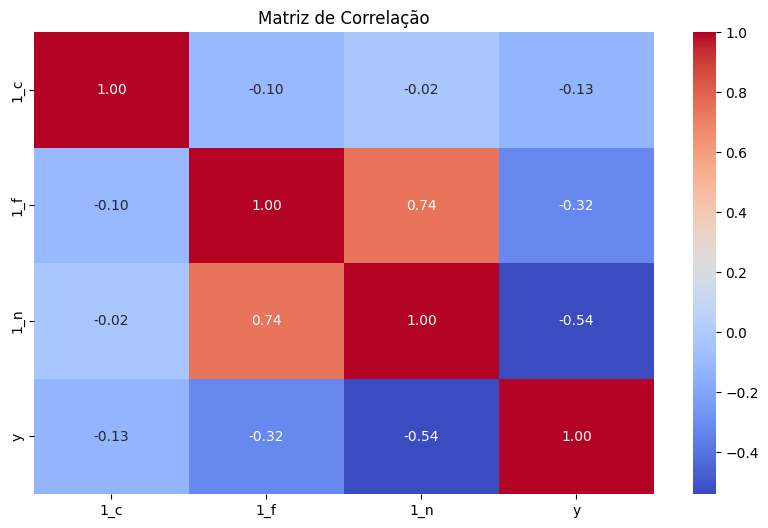

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(df_V1.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

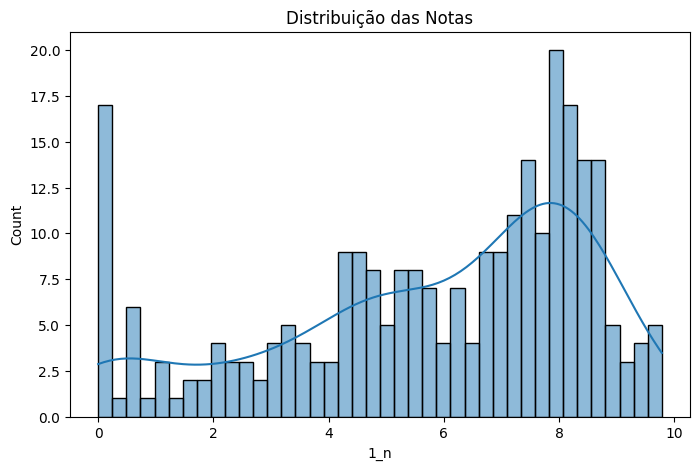

In [43]:
plt.figure(figsize=(8, 5))
sns.histplot(df_V1['1_n'], bins=40, kde=True)
plt.title("Distribuição das Notas")
plt.show()

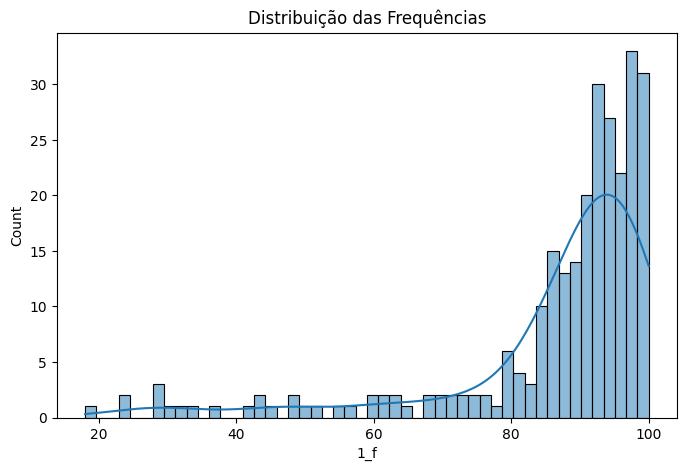

In [45]:
plt.figure(figsize=(8, 5))
sns.histplot(df_V1['1_f'], bins=50, kde=True)
plt.title("Distribuição das Frequências")
plt.show()

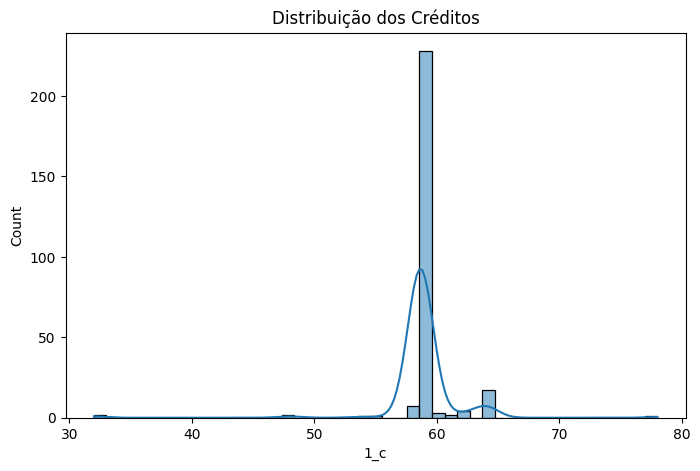

In [41]:
plt.figure(figsize=(8, 5))
sns.histplot(df_V1['1_c'], bins=45, kde=True)
plt.title("Distribuição dos Créditos")
plt.show()

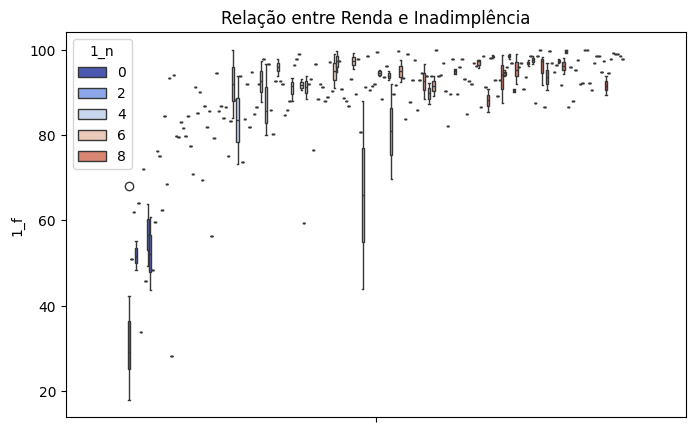

In [46]:
plt.figure(figsize=(8, 5))
sns.boxplot(hue="1_n", y="1_f", data=df_V1, palette="coolwarm")
plt.title("Relação entre Renda e Inadimplência")
plt.show()

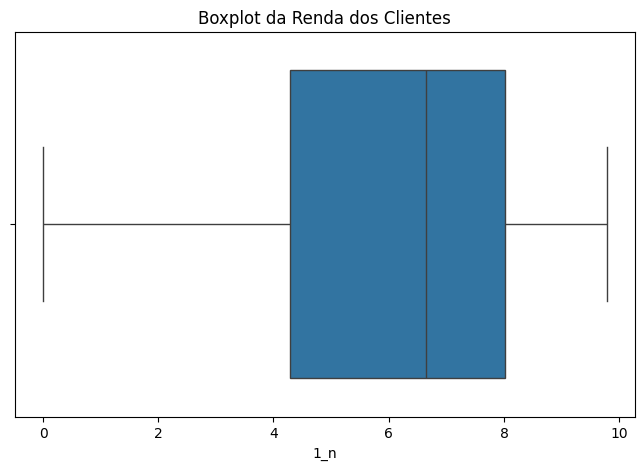

In [50]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_V1["1_n"])
plt.title("Boxplot da Renda dos Clientes")
plt.show()